# Problem Set 2

* Fundamental Types
* Intro to Generic Programming (1st half)

In [1]:
using InstantiateFromURL
# optionally add arguments to force installation: instantiate = true, precompile = true
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.8.0")

Activated /Users/taisei/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.8.0


In [2]:
using LinearAlgebra, Statistics,Plots,StaticArrays,BenchmarkTools,Polynomials

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260
┌ Warning: Module JSON with build ID 33541892065587 is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1016
┌ Info: Skipping precompilation since __precompile__(false). Importing Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80].
└ @ Base loading.jl:1033
┌ Info: Precompiling GR [28b8d3ca-fb5f-59d9-8090-bfdbd6d07a71]
└ @ Base loading.jl:1260
┌ Warning: Module JSON with build ID 33541892065587 is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1016
┌ Info: Skipping precompilation since __precompile__(false). Importing GR [28b8d3ca-fb5f-59d9-8090-bfdbd6d07a71].
└ @ Base loading.jl:1033
┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8

## Fundamental Types

### Exercise 2

In [17]:
function f_ex2(θ;γ=1.0,σ=1.0,y_0=0.0,T=150)
    y=zeros(T+1)
    ymean=zeros(T+1)
    t=1
    y[1]=y_0
    ymean[1]=y_0
    while t<=T
        y[t+1]=γ+θ*y[t]+σ*randn()
        ymean[t+1]=mean(y[1]:y[t+1])
        t+=1
    end
return y,ymean
end


f_ex2 (generic function with 1 method)

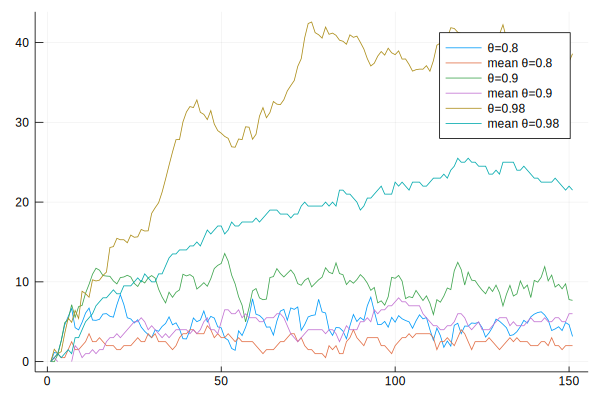

In [18]:
p=plot()
for θ in [0.8,0.9,0.98]
    plot!(p,f_ex2(θ)[1],label="θ=$θ")
    plot!(p,f_ex2(θ)[2],label="mean θ=$θ")
end
p

In [19]:
function finaldist(θ;process=f_ex2,γ=1.0,σ=1.0,y_0=0.0,T=150,N=200)
    y_sim=zeros(N)
    n=1
    while n<=N
        y=process(θ)[1]
        y_sim[n]=y[T+1]
        n+=1
    end
return y_sim
end
    

finaldist (generic function with 1 method)

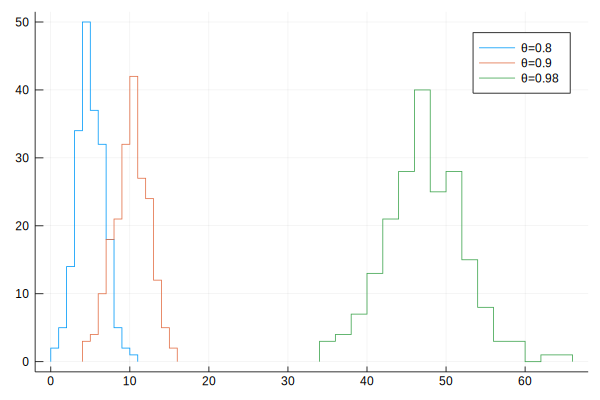

In [47]:
h=stephist()
for θ in [0.8,0.9,0.98]
    stephist!(h,finaldist(θ),label="θ=$θ")
end
h

In [51]:
for θ in [0.8,0.9,0.98]
    mean1=mean(finaldist(θ))
    variance1=mean(finaldist(θ).^2)-mean(finaldist(θ))^2
    println("for θ=$θ,the mean is $mean1 and the variance is $variance1")
end

for θ=0.8,the mean is 4.957860849217901 and the variance is 1.808140997655297
for θ=0.9,the mean is 9.85425427829826 and the variance is 5.4168721937750774
for θ=0.98,the mean is 47.604968697193016 and the variance is 34.44827843416533


**Depending on random drows, the variance becomes negative.**

### Exercise 3

In [113]:
function f_ex3(;N=50,M=20,a=0.1,b=0.2,c=0.5,d=1.0,σ=0.1)
    x1,x2=randn(N),randn(N)
    X=hcat(x1,x1.^2,x2,ones(N))
    θ=zeros(size(X)[2],M)
    m=1
    while m<=M
        y=a*x1.+b*(x1.^2).+c*x2 .+d.+σ*randn(N)
        θ[:,m]=(X'*X)\X'*y
        m+=1
    end
    return θ
end


f_ex3 (generic function with 8 methods)

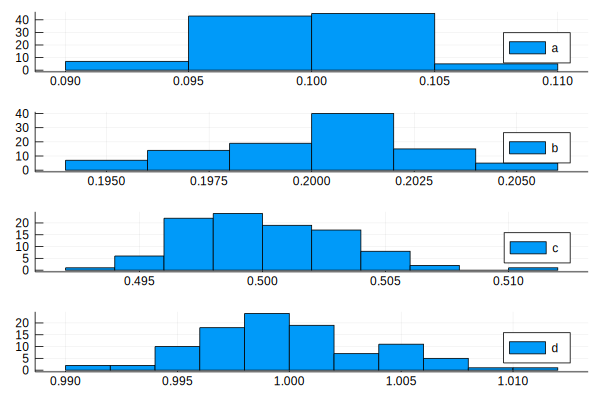

In [118]:
para=f_ex3(N=1000,M=100)
h_a=histogram(para[1,:],label="a")
h_b=histogram(para[2,:],label="b")
h_c=histogram(para[3,:],label="c")
h_d=histogram(para[4,:],label="d")

plot(h_a,h_b,h_c,h_d,layout=(4,1))

### Exercise 4

In [107]:
#recap Exercise 1
function compute_asymptotic_var(A, Σ;
                                S0 = Σ * Σ',
                                tolerance = 1e-6,
                                maxiter = 500)
    V = Σ * Σ'
    S = S0
    err = tolerance + 1
    i = 1
    while err > tolerance && i ≤ maxiter
        next_S = A * S * A' + V
        err = norm(S - next_S)
        S = next_S
        i += 1
    end
    return S
end

compute_asymptotic_var (generic function with 1 method)

In [108]:
#recap Exercise 1 (cont'd)
A = [0.8  -0.2;
     -0.1  0.7]

Σ = [0.5 0.4;
     0.4 0.6]
our_solution = compute_asymptotic_var(A, Σ)

2×2 Array{Float64,2}:
 0.671228  0.633476
 0.633476  0.858874

In [109]:
using NLsolve
A = [0.8  -0.2;
     -0.1  0.7]

Σ = [0.5 0.4;
     0.4 0.6]
iv = Σ*Σ'
f(S)=A*S*A'+Σ*Σ'
sol = fixedpoint(f, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = [0.6712314073226502 0.6334739702517158; 0.6334739702517158 0.8588744279176175], and |f(x) - x| = 2.475075345743422e-15 in 5 iterations


## Intro to Generic Programming

### Exercise 1

In [120]:
v1=SVector(1,2,3)

3-element SArray{Tuple{3},Int64,1,3} with indices SOneTo(3):
 1
 2
 3

In [126]:
subtypes(eltype(v1))

0-element Array{Type,1}

In [127]:
subtypes(AbstractArray)

36-element Array{Any,1}:
 AbstractRange
 Adjoint
 Base.LogicalIndex
 Base.ReinterpretArray
 Base.ReshapedArray
 Bidiagonal
 BitArray
 CartesianIndices
 Core.Compiler.AbstractRange
 Core.Compiler.BitArray
 Core.Compiler.LinearIndices
 DataStructures.CircularBuffer
 DataStructures.DiBitVector
 ⋮
 StaticArray
 StaticArrays.TrivialView
 StatsBase.AbstractWeights
 SubArray
 SuiteSparse.CHOLMOD.FactorComponent
 SymTridiagonal
 Symmetric
 Test.GenericArray
 Transpose
 Tridiagonal
 UpperHessenberg
 ZMQ.Message

In [128]:
subtypes(StaticArray)

14-element Array{Any,1}:
 FieldVector
 GeometryTypes.AbstractPoint
 GeometryTypes.AbstractSimplex
 GeometryTypes.Face
 GeometryTypes.FixedSizeArrays.Point
 GeometryTypes.FixedSizeArrays.Vec
 GeometryTypes.Normal
 GeometryTypes.TextureCoordinate
 GeometryTypes.Vec
 MArray
 SArray
 SHermitianCompact
 SUnitRange
 SizedArray

In [134]:
N = 3
A = rand(N, N)
x = rand(N)

@btime $A * $x  # the $ in front of variable names is sometimes important
@btime inv($A)

  64.404 ns (1 allocation: 112 bytes)
  453.558 ns (5 allocations: 1.98 KiB)


3×3 Array{Float64,2}:
  2.3338     2.48871  -5.50904
 -1.71819    2.81862   0.852599
  0.522577  -2.7763    3.18452

In [133]:
N = 3
A = @SMatrix randn(N,N)
x = @SVector randn(N)
@btime $A * $x  # the $ in front of variable names is sometimes important
@btime inv($A)

  0.023 ns (0 allocations: 0 bytes)
  6.489 ns (0 allocations: 0 bytes)


3×3 SArray{Tuple{3,3},Float64,2,9} with indices SOneTo(3)×SOneTo(3):
  0.0420855  -1.99823    0.539775
 -1.19491     0.109575  -0.241721
 -0.478178    1.34296   -1.32912

In [135]:
N=15
A = rand(N, N)
x = rand(N)

@btime $A * $x  # the $ in front of variable names is sometimes important
@btime inv($A)
A = @SMatrix randn(N,N)
x = @SVector randn(N)
@btime $A * $x  # the $ in front of variable names is sometimes important
@btime inv($A)

  104.972 ns (1 allocation: 208 bytes)
  3.363 μs (5 allocations: 9.88 KiB)
  0.025 ns (0 allocations: 0 bytes)
  3.564 μs (6 allocations: 11.86 KiB)


15×15 SArray{Tuple{15,15},Float64,2,225} with indices SOneTo(15)×SOneTo(15):
  0.31015    -1.95576    -1.95584    …  -10.9331     3.18017    -5.05078
  0.0723115  -0.781783   -0.67155        -3.67027    1.15053    -1.59732
 -0.376398    1.94413     2.00646        11.3074    -3.15855     5.32345
 -0.292688    1.06604     1.18039         6.28694   -1.87463     2.92399
  0.535451    0.118742   -0.449113       -3.28021    0.855973   -1.16199
 -0.290684   -0.385472    0.23567    …    1.84403   -0.481973    0.443278
 -0.248483   -0.34648     0.0530043       0.937513  -0.558294    0.138525
  0.116507   -0.705363   -0.745008       -3.79037    1.0028     -1.80865
  0.39923    -0.0541162  -0.26606        -2.35633    0.7081     -0.904428
  0.429197    0.818211    0.301858        0.563972  -0.0859103   0.488449
  0.0553529   0.428352    0.0945982  …   -0.351958  -0.0943682   0.274753
 -0.382825    1.10528     1.22156         7.48759   -2.189       3.49273
  0.500359   -0.55524    -1.08068        -

### Exercise 2

In [136]:
# benchmark
Σ = [0.4  0.3;
     0.3  0.45]
G = I
R = 0.5 * Σ

gain(Σ, G, R) = Σ * G' * inv(G * Σ * G' + R)
@btime gain($Σ, $G, $R)

  614.813 ns (10 allocations: 1.94 KiB)


2×2 Array{Float64,2}:
 0.666667     1.11022e-16
 1.11022e-16  0.666667

In [138]:
# Using SArray
Σ = @SArray [0.4  0.3;
     0.3  0.45]
G = I
R = 0.5 * Σ

gain(Σ, G, R) = Σ * G' * inv(G * Σ * G' + R)
@btime gain($Σ, $G, $R)

  0.024 ns (0 allocations: 0 bytes)


2×2 SArray{Tuple{2,2},Float64,2,4} with indices SOneTo(2)×SOneTo(2):
 0.666667     1.11022e-16
 2.22045e-16  0.666667

In [139]:
# Using SMatrix
Σ = @SMatrix [0.4  0.3;
     0.3  0.45]
G = I
R = 0.5 * Σ

gain(Σ, G, R) = Σ * G' * inv(G * Σ * G' + R)
@btime gain($Σ, $G, $R)

  0.025 ns (0 allocations: 0 bytes)


2×2 SArray{Tuple{2,2},Float64,2,4} with indices SOneTo(2)×SOneTo(2):
 0.666667     1.11022e-16
 2.22045e-16  0.666667

**NOTE**: No difference between Smarix SArray

### Exercise 3

In [3]:
p = Poly([2, -5, 2], :x)  # :x just gives a symbol for display

@show p
p′ = polyder(p)   # gives the derivative of p, another polynomial
@show p(0.1), p′(0.1)  # call like a function
@show roots(p);   # find roots such that p(x) = 0

p = Poly(2 - 5*x + 2*x^2)
(p(0.1), p′(0.1)) = (1.52, -4.6)
roots(p) = [0.5, 2.0]


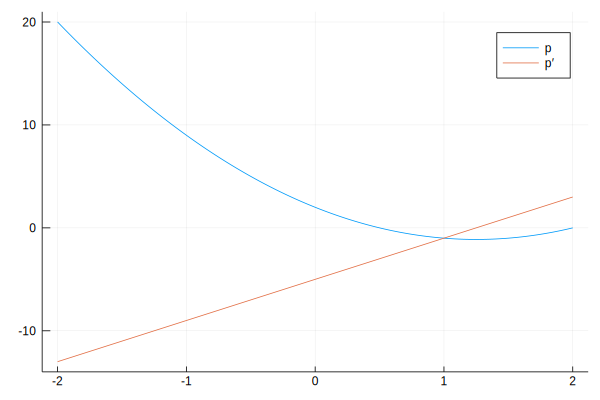

In [7]:
x = -2:0.01:2
p_x = p.(x)
p_x_der = p′.(x)
plot(x,p_x,label="p")
plot!(x,p_x_der,label="p′")